# Sami Almuallim

## Research question/interests

**How are the different metrics of pride represented in this data set correlated?** Answering this question will provide a foundation upon which we can work to answer the more complicated questions that follow.

- This will probably be the simplest research question, requiring only the data contained in our original data set. To explore this topic, we will use different visualization methods discussed in class to develop a better understanding of the data.

**Is there a positive or a negative correlation between taxes paid and the pride of a given queer neighbourhood?** Taxes are influenced by a variety of socio-economic factors and we hope that in analyzing both tax data and our quantification of queerness on a geographic level, we'll be able to gleam insight into the question of how queerness and class are interrelated.

- Similar again to the first research question posed, we'll need to find another data set containing geographically located tax data, which should be easy to acquire from the US government (for example, [in our cursory research, we found this data set from the IRS](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2018-zip-code-data-soi)).
- This would bring the number of data sets used in this project up to three, which might present some challenges in terms of the amount of data wrangling necessary to bring it all together.
- To measure this, we would rank the neighbourhoods presented in the gaybourhoods data set by pride (an open question which we will explore in a separate research question)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

gaybourhoods = pd.read_csv("../data/raw/gaybourhoods.csv")
gaybourhoods.head(5)

,GEOID10,Tax_Mjoint,Mjoint_MF,Mjoint_SS,Mjoint_FF,Mjoint_MM,TaxRate_SS,TaxRate_FF,TaxRate_MM,Cns_TotHH,...,FF_Cns,FF_Index,MM_Tax,MM_Cns,MM_Index,SS_Index,SS_Index_Weight,Parade_Weight,Bars_Weight,TOTINDEX
0,90069,2120,1689,431,61,370,203.301887,28.773585,174.528302,12551,...,1.847099,6.724415,29.583721,18.704533,48.288254,55.012669,39.429995,10,17.647059,67.077054
1,94114,5080,4036,1044,170,874,205.511811,33.464567,172.047244,16456,...,4.161579,9.834048,29.163165,19.415304,48.578469,58.412517,41.866815,0,20.000000,61.866815
2,10011,5790,5166,624,97,527,107.772021,16.753022,91.018998,29762,...,1.531029,4.370779,15.428332,10.932081,26.360413,30.731192,22.026394,10,5.882353,37.908747
3,10014,3510,3229,281,74,207,80.056980,21.082621,58.974359,18786,...,2.482293,6.055939,9.996551,5.943318,15.939869,21.995808,15.765361,10,11.764706,37.530067
4,94103,2660,2417,243,34,209,91.353383,12.781955,78.571429,12728,...,0.837431,3.004058,13.318386,4.961779,18.280165,21.284224,15.255337,10,10.588235,35.843573


## Data wrangling

In [2]:
# NOTE: This cell will not work unless this file is in the repository. The source
# can be found linked in the references section of the readme, however, it is too
# big for GitHub to handle.

#irs = pd.read_csv("../data/raw/irs_2015.csv")

# Naively splitting the IRS data set in two. More formal data wrangling will
# come later
#irs1 = irs.head(int(irs.shape[0] / 2))
#irs2 = irs.tail(int(irs.shape[0] / 2))

#irs1.to_csv("../data/processed/irs_2015_1", index=False)
#irs2.to_csv("../data/processed/irs_2015_2", index=False)

In [3]:
# Now these two datasets can be joined and worked with
irs = pd.concat([
    pd.read_csv("../data/processed/irs_2015_1"),
    pd.read_csv("../data/processed/irs_2015_2")
])
# irs.head()


#selected data: ZIPCODE - this will be used in conjunction with the rest of the set
            #   N2 - population of zip code
            
            #data of intrest
                #     A11900	Total overpayments amount
                #   AGI_STUB - metric for income

# print(irs.loc[irs['zipcode']==90069])
# df = {irs['zipcode'], irs['N2']}



In [4]:
#wrangle tax
taxdf = pd.DataFrame(zip(irs['zipcode'], irs['N2'], irs['agi_stub'], irs['A11901']))
taxdf.columns=('zip', 'population', 'income', 'overall tax paid')
taxdf.describe()

,zip,population,income,overall tax paid
count,166698.000000,1.666980e+05,166698.00000,1.666980e+05
mean,48877.636432,3.432536e+03,3.50000,1.844871e+03
std,27146.337114,6.676873e+04,1.70783,5.785610e+04
min,0.000000,0.000000e+00,1.00000,0.000000e+00
25%,27040.000000,1.400000e+02,2.00000,1.600000e+01
50%,48879.000000,5.100000e+02,3.50000,1.440000e+02
75%,70607.000000,2.000000e+03,5.00000,6.310000e+02
max,99999.000000,9.566490e+06,6.00000,1.557123e+07


In [5]:
#wrangle gay
gaydf = pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['Tax_Mjoint']))
gaydf.columns=(('zip', 'gay tax rate'))

gaydf.describe()

,zip,gay tax rate
count,2328.000000,2328.000000
mean,48616.478522,4103.440722
std,35481.240641,3140.699446
min,1730.000000,0.000000
25%,11362.750000,1767.500000
50%,46351.000000,3635.000000
75%,80234.250000,5745.000000
max,98686.000000,24560.000000


In [6]:
#merge
df = pd.merge(taxdf, gaydf)

# print(df)

df2 = df.groupby(df['zip']).aggregate({ 'zip':'first',
                                        'population': 'sum',
                                        'gay tax rate':'first',
                                        'overall tax paid':'first',
                                        'income':'first'
                                                                })

df2.to_csv("../data/processed/tax_and_gay.csv")
df2.describe()

,zip,population,gay tax rate,overall tax paid,income
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.0
mean,48935.203297,26691.730769,4373.997253,596.719322,1.0
std,35451.335807,17960.713867,3054.620840,615.174358,0.0
min,1730.000000,160.000000,0.000000,0.000000,1.0
25%,11360.750000,13337.500000,2110.000000,217.000000,1.0
50%,60023.500000,24070.000000,3900.000000,434.000000,1.0
75%,80227.250000,35640.000000,5902.500000,777.250000,1.0
max,98686.000000,114420.000000,24560.000000,9166.000000,1.0


In [7]:
df2

,zip,population,gay tax rate,overall tax paid,income
zip,,,,,
1730,1730,13570.0,3260,150.0,1
1731,1731,2450.0,550,0.0,1
1742,1742,17170.0,4220,297.0,1
1760,1760,34350.0,7880,468.0,1
1770,1770,4310.0,1060,46.0,1
...,...,...,...,...,...
98682,98682,57010.0,11080,703.0,1
98683,98683,30700.0,6470,358.0,1
98684,98684,27630.0,5390,371.0,1


In [8]:
## take the dataset & add long/lat
## props to Nat for creating the backbone I used to zipcode -> long/lat

cords = pd.read_csv("../data/raw/zip_lat_long.csv")
gaydf = pd.read_csv("../data/processed/tax_and_gay.csv")

# Let's add long/lat columns to gb
gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")

# // unneded was already filtered out

# There's a lot of info baked into some of these columns. Especially the composite indexes.
# We'll leave their names as is for easy reference even if they're a little ugly.
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")

# gb.to_csv("../data/processed/gaybourhoods-nat.csv")
# gb.head()

# unperson unneccesary zip codes
del gaydf['zip.1']
del gaydf['ZIP']

gaydf.describe()

,zip,population,gay tax rate,overall tax paid,income,lat,long
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.0,2184.000000,2184.000000
mean,48935.203297,26691.730769,4373.997253,596.719322,1.0,38.016518,-91.296804
std,35451.335807,17960.713867,3054.620840,615.174358,0.0,5.210272,18.476699
min,1730.000000,160.000000,0.000000,0.000000,1.0,25.572213,-123.118977
25%,11360.750000,13337.500000,2110.000000,217.000000,1.0,33.997027,-105.037767
50%,60023.500000,24070.000000,3900.000000,434.000000,1.0,39.930150,-87.603617
75%,80227.250000,35640.000000,5902.500000,777.250000,1.0,40.960828,-74.310179
max,98686.000000,114420.000000,24560.000000,9166.000000,1.0,47.916786,-70.758184


In [9]:
gaydf

,zip,population,gay tax rate,overall tax paid,income,lat,long
0,1730,13570.0,3260,150.0,1,42.499295,-71.281889
1,1731,2450.0,550,0.0,1,42.456748,-71.279484
2,1742,17170.0,4220,297.0,1,42.462911,-71.364496
3,1760,34350.0,7880,468.0,1,42.284822,-71.348811
4,1770,4310.0,1060,46.0,1,42.231947,-71.372963
...,...,...,...,...,...,...,...
2179,98682,57010.0,11080,703.0,1,45.673209,-122.481745
2180,98683,30700.0,6470,358.0,1,45.603287,-122.510170
2181,98684,27630.0,5390,371.0,1,45.630556,-122.514839
2182,98685,27540.0,6490,298.0,1,45.715211,-122.693165


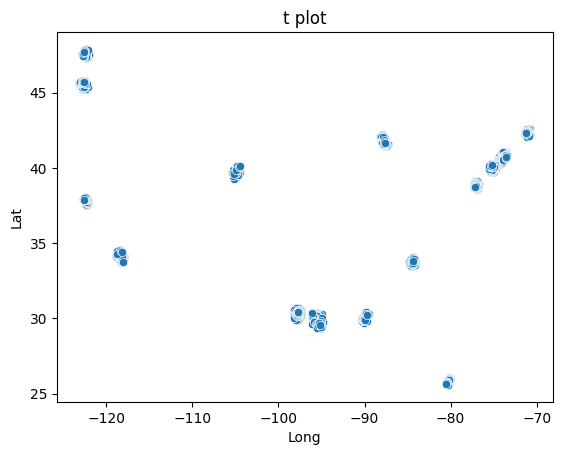

In [10]:

#compare taxes paid by queers to taxes paid by general

plot1 = sns.scatterplot(data=gaydf, x="long", y="lat")
_ = plot1.set(xlabel="Long", ylabel="Lat", title="t plot")

The next step is to compare the gay data to the typical data, so the following models are used to compare the taxes each group paid

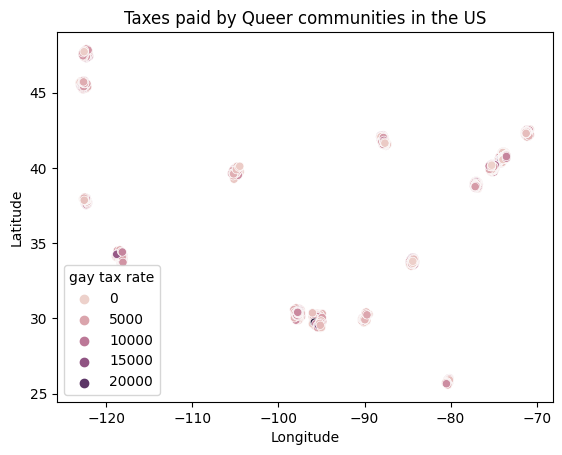

In [11]:

gaydfgaytaxplot = gaydf.copy()

# gaydf.head()

del gaydfgaytaxplot['zip']
del gaydfgaytaxplot['population']
del gaydfgaytaxplot['overall tax paid']
del gaydfgaytaxplot['income']
# del gaydfgaytaxplot['gay tax rate']

plot2 = sns.scatterplot(data=gaydfgaytaxplot, x="long", y="lat", hue='gay tax rate')
_ = plot2.set(xlabel="Longitude", ylabel="Latitude", title="Taxes paid by Queer communities in the US")


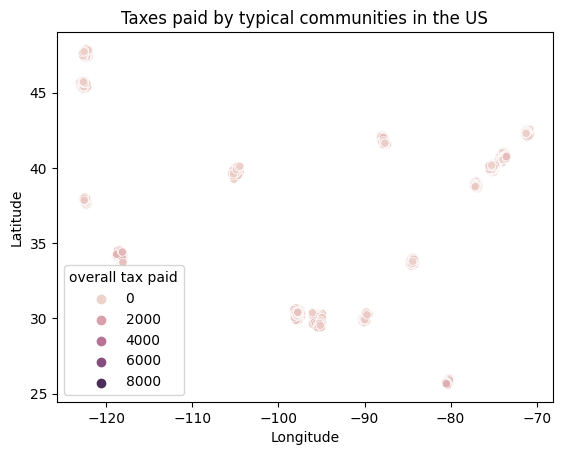

In [12]:
gaydfgentaxplot = gaydf.copy()

# gaydf.head()

del gaydfgentaxplot['zip']
del gaydfgentaxplot['population']
# del gaydfgentaxplot['overall tax paid']
del gaydfgentaxplot['income']
# del gaydfgaytaxplot['gay tax rate']

plot2 = sns.scatterplot(data=gaydfgentaxplot, x="long", y="lat", hue='overall tax paid')
_ = plot2.set(xlabel="Longitude", ylabel="Latitude", title="Taxes paid by typical communities in the US")

In [13]:
gaydfhybridplot = pd.merge(gaydfgentaxplot, gaydfgaytaxplot)

gaydfhybridplot.describe()


,gay tax rate,overall tax paid,lat,long
count,2184.000000,2184.000000,2184.000000,2184.000000
mean,4373.997253,596.719322,38.016518,-91.296804
std,3054.620840,615.174358,5.210272,18.476699
min,0.000000,0.000000,25.572213,-123.118977
25%,2110.000000,217.000000,33.997027,-105.037767
50%,3900.000000,434.000000,39.930150,-87.603617
75%,5902.500000,777.250000,40.960828,-74.310179
max,24560.000000,9166.000000,47.916786,-70.758184


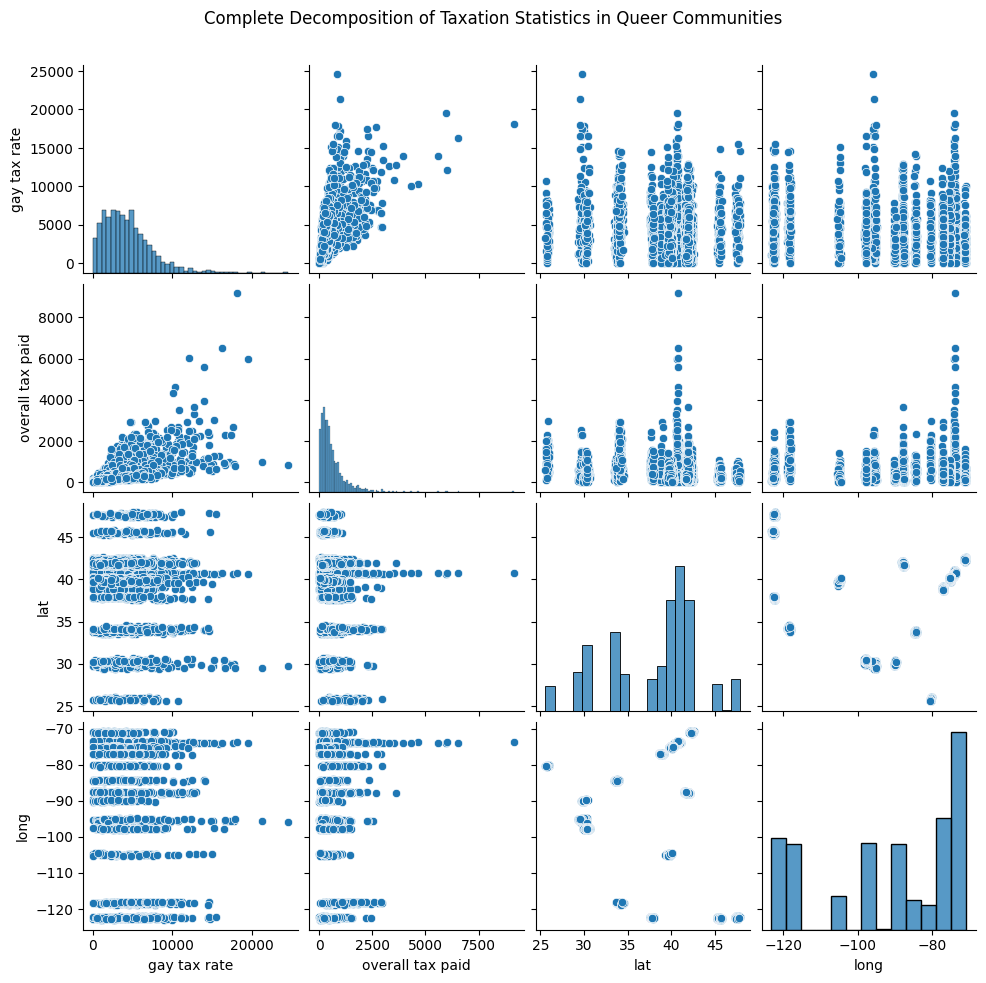

In [14]:
plt = sns.pairplot(gaydfhybridplot)
_ = plt.figure.suptitle("Complete Decomposition of Taxation Statistics in Queer Communities")
plt.figure.subplots_adjust(top=0.925)

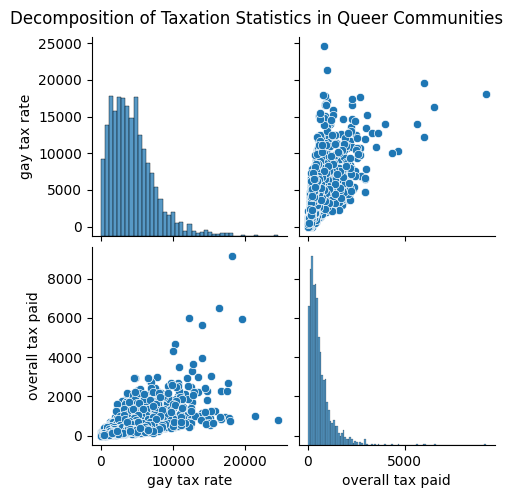

In [15]:
gaydflight = gaydfhybridplot.copy()

del gaydflight['lat']; del gaydflight['long']

plt = sns.pairplot(gaydflight)
_ = plt.figure.suptitle("Decomposition of Taxation Statistics in Queer Communities")
plt.figure.subplots_adjust(top=0.925)


As we can infer by taking the first derivative of the corelation line of this graph, queer communities pay significantly more taxes then typical neighborhoods. An explanation for this is queer people through one mechanism or another (queer folk being more likely to be politically progressive, live in cities, or get educations for example) end up corelating strongly with demographics who pay more tax

Do note that the analysis is severely limited by severe sampling bias as only hyper urban geographical stratum have been surveyed by gayborhoods

**How are the different metrics of pride represented in this data set correlated?**


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

gaybourhoods = pd.read_csv("../data/raw/gaybourhoods.csv")
gaybourhoods.head(5)

,GEOID10,Tax_Mjoint,Mjoint_MF,Mjoint_SS,Mjoint_FF,Mjoint_MM,TaxRate_SS,TaxRate_FF,TaxRate_MM,Cns_TotHH,...,FF_Cns,FF_Index,MM_Tax,MM_Cns,MM_Index,SS_Index,SS_Index_Weight,Parade_Weight,Bars_Weight,TOTINDEX
0,90069,2120,1689,431,61,370,203.301887,28.773585,174.528302,12551,...,1.847099,6.724415,29.583721,18.704533,48.288254,55.012669,39.429995,10,17.647059,67.077054
1,94114,5080,4036,1044,170,874,205.511811,33.464567,172.047244,16456,...,4.161579,9.834048,29.163165,19.415304,48.578469,58.412517,41.866815,0,20.000000,61.866815
2,10011,5790,5166,624,97,527,107.772021,16.753022,91.018998,29762,...,1.531029,4.370779,15.428332,10.932081,26.360413,30.731192,22.026394,10,5.882353,37.908747
3,10014,3510,3229,281,74,207,80.056980,21.082621,58.974359,18786,...,2.482293,6.055939,9.996551,5.943318,15.939869,21.995808,15.765361,10,11.764706,37.530067
4,94103,2660,2417,243,34,209,91.353383,12.781955,78.571429,12728,...,0.837431,3.004058,13.318386,4.961779,18.280165,21.284224,15.255337,10,10.588235,35.843573


In [17]:
#wrangle gay
# gaydf = pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['Parade_Weight'], gaybourhoods['Bars_Weight']))


# print(gaydf.describe())
# print(gaydf)

cords = pd.read_csv("../data/raw/zip_lat_long.csv")

# gaydf = pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['ParadeFlag'], gaybourhoods['CountBars']))
# gaydf.columns=(('zip', 'pride parade index', 'gay bars index'))
# gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")


def loadprideindexes(secdf):
    gaydf = pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['ParadeFlag'], gaybourhoods['CountBars']))
    gaydf.columns=(('zip', 'pride parade index', 'gay bars index'))
    gaydf = gaydf.merge(secdf, left_on="zip", right_on="ZIP")
    
    return gaydf
    
    # gaydf = (
    #     pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['ParadeFlag'], gaybourhoods['CountBars']))
    #     .columns=(('zip', 'pride parade index', 'gay bars index'))
    #     # .merge(cords, left_on="zip", right_on="ZIP")
    # )

gaydf = loadprideindexes(cords)

def notzip(dat):
    del dat['zip']
    del dat['ZIP']

notzip(gaydf)

# // unneded was already filtered out

# There's a lot of info baked into some of these columns. Especially the composite indexes.
# We'll leave their names as is for easy reference even if they're a little ugly.
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")

# unperson unneccesary zip codes
# del gaydf['zip.1']
# del gaydf['ZIP']


gaydf.to_csv("../data/processed/gay_pride", index=False)

gaydf.describe()

,pride parade index,gay bars index,lat,long
count,2328.000000,2328.000000,2328.000000,2328.000000
mean,0.017612,0.118127,38.044304,-91.221236
std,0.131563,0.861863,5.148365,18.533499
min,0.000000,0.000000,25.572213,-123.118977
25%,0.000000,0.000000,34.021932,-105.049099
50%,0.000000,0.000000,39.899977,-87.494097
75%,0.000000,0.000000,40.912413,-74.288743
max,1.000000,17.000000,47.916786,-70.758184


In [18]:
gaydf = pd.read_csv("../data/processed/gay_pride")

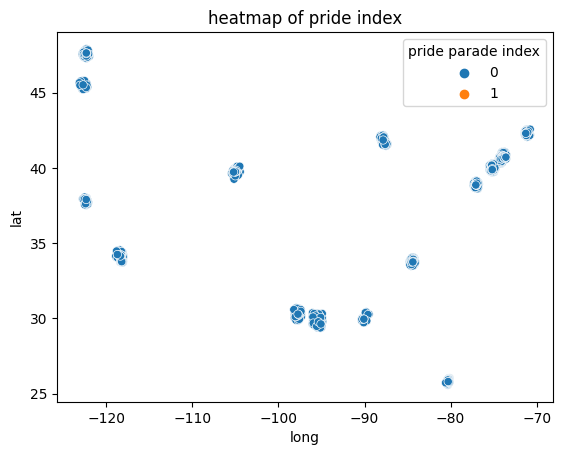

In [19]:
gaydfprideplot = gaydf.copy()

plot3 = sns.scatterplot(data=gaydfprideplot, x="long", y="lat", hue="pride parade index")
_ = plot3.set(xlabel="long", ylabel="lat", title = "heatmap of pride index")

It seemed that most communities did not have a pride parade, but a number of them still did

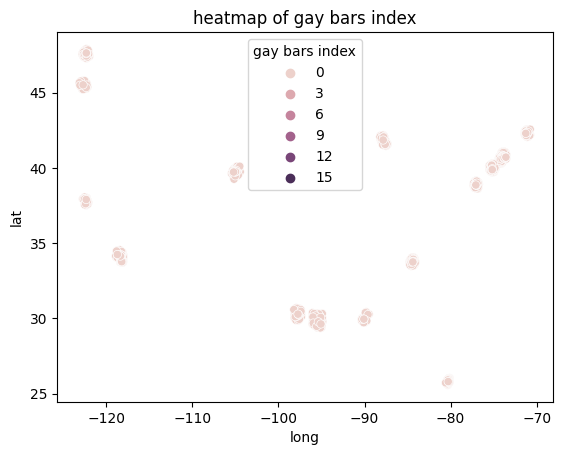

In [20]:
gaydfgaybarsplot = gaydf.copy()

plot4 = sns.scatterplot(data=gaydfprideplot, x="long", y="lat", hue="gay bars index")
_ = plot4.set(xlabel="long", ylabel="lat", title = "heatmap of gay bars index")

it looks like certain communities had large numbers of bars but most didn't

the next step is to find the distribution of gay bars

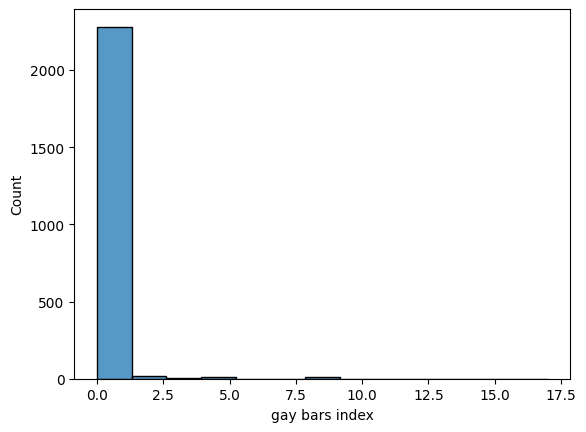

In [21]:
plot5 = sns.histplot(gaydfgaybarsplot["gay bars index"])

looks like the hypothesis was right - most communities with gay bars had multiple

In [22]:
gaydfhybridplot2 = pd.merge(gaydfprideplot, gaydfgaybarsplot)

gaydfhybridplot2.describe()

,pride parade index,gay bars index,lat,long
count,2328.000000,2328.000000,2328.000000,2328.000000
mean,0.017612,0.118127,38.044304,-91.221236
std,0.131563,0.861863,5.148365,18.533499
min,0.000000,0.000000,25.572213,-123.118977
25%,0.000000,0.000000,34.021932,-105.049099
50%,0.000000,0.000000,39.899977,-87.494097
75%,0.000000,0.000000,40.912413,-74.288743
max,1.000000,17.000000,47.916786,-70.758184


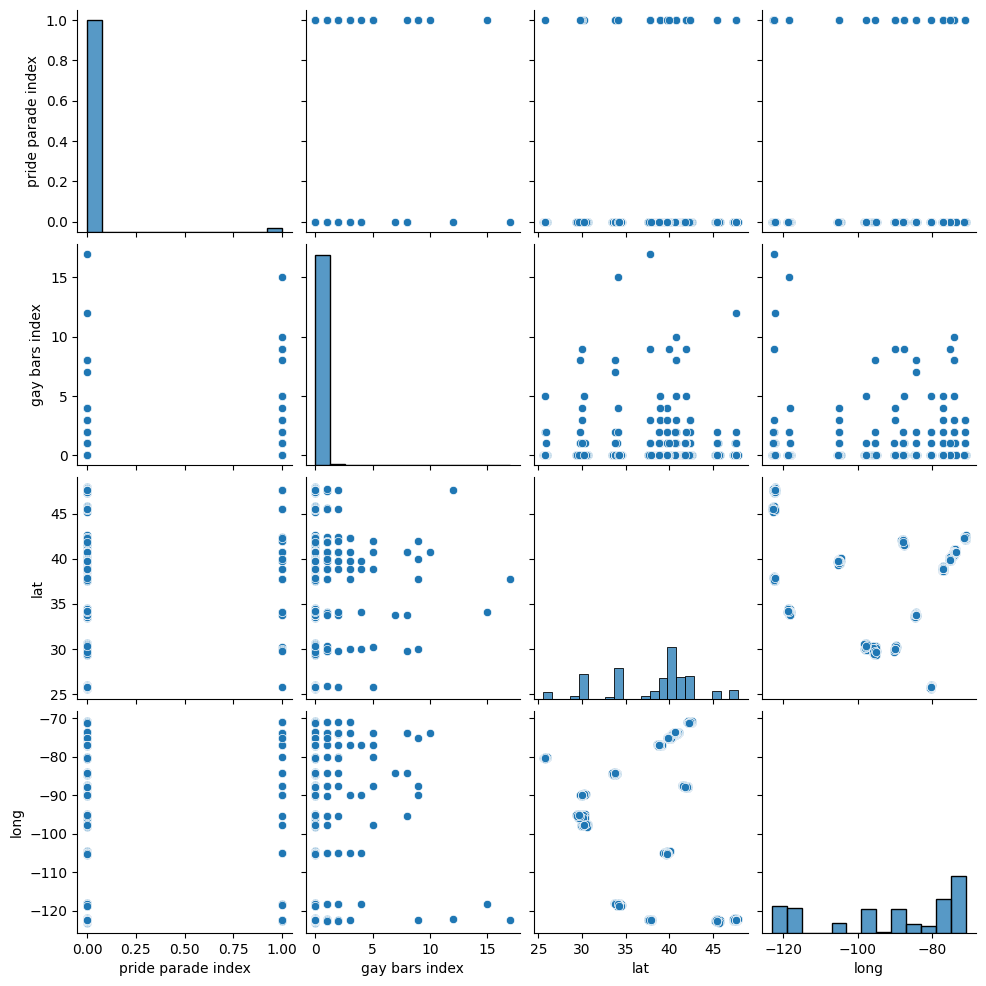

In [23]:
# del gaydfhybridplot2['zip']; del gaydfhybridplot2['ZIP']

sns.pairplot(gaydfhybridplot2)

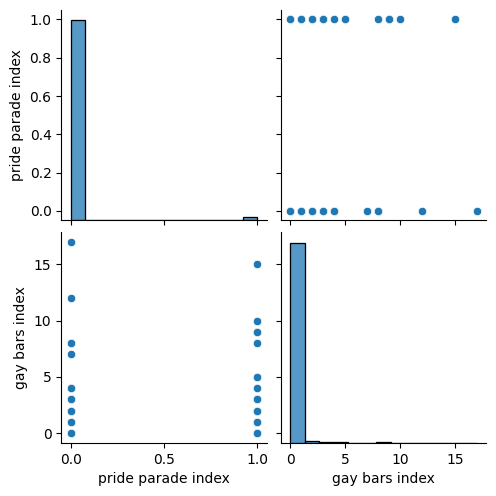

In [24]:
gaydflight2 = gaydfhybridplot2.copy()

del gaydflight2['lat']; del gaydflight2['long']

sns.pairplot(gaydflight2)

to find a correlation we remove the zero value & find correlation

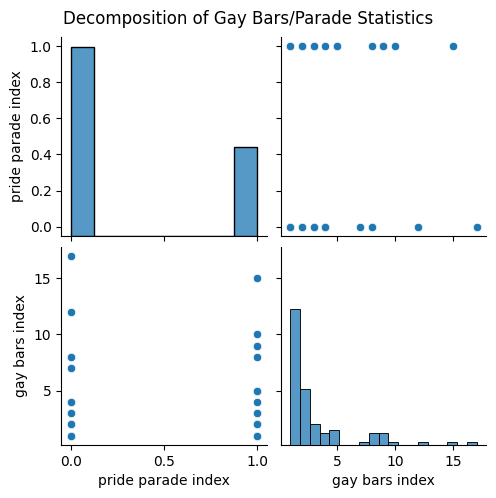

In [25]:
gaydflight3 = gaydflight2[gaydflight2['gay bars index'] != 0]
# gaydflight3 = gaydflight3[gaydflight3['pride parade index'] != 0]

plt = sns.pairplot(gaydflight3)
_ = plt.figure.suptitle("Decomposition of Gay Bars/Parade Statistics")
plt.figure.subplots_adjust(top=0.925)

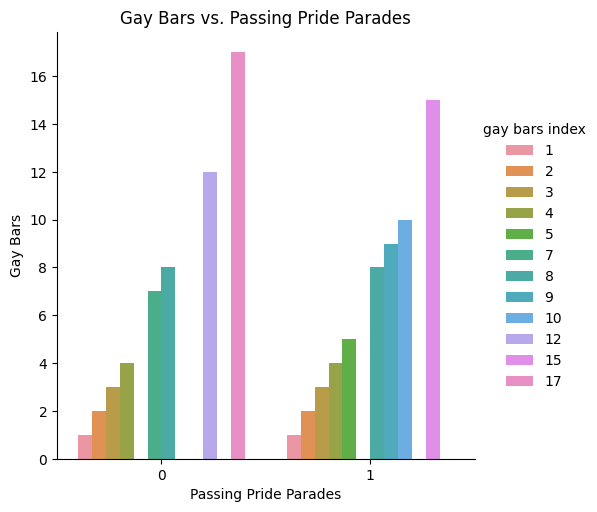

In [26]:
gaydflightparade = gaydflight3[gaydflight3['pride parade index'] != 0]

gaydflightnoparade = gaydflight3[gaydflight3['pride parade index'] != 1]

g = sns.catplot(
    data=gaydflight3, kind="bar",
    x='pride parade index', y='gay bars index', hue='gay bars index'
)

g.set(title="Gay Bars vs. Passing Pride Parades", ylabel="Gay Bars", xlabel="Passing Pride Parades")

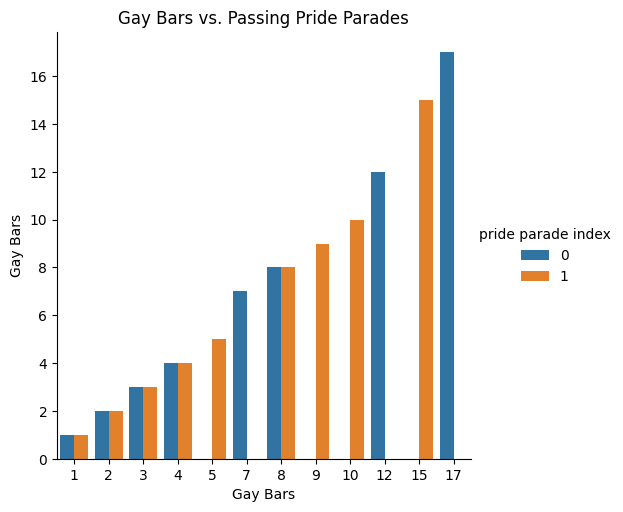

In [27]:
gaydflightparade = gaydflight3[gaydflight3['pride parade index'] != 0]

gaydflightnoparade = gaydflight3[gaydflight3['pride parade index'] != 1]

g = sns.catplot(
    data=gaydflight3, kind="bar",
    x='gay bars index', y='gay bars index', hue='pride parade index'
)

g.set(xlabel="Gay Bars", ylabel="Gay Bars", title="Gay Bars vs. Passing Pride Parades")

the above shows that my hypothesis 'more gay bars <==> more pride parades' should be rejected

against my expectation, more gay bars are located in regions pride parades don't pass through

the obvious explanation I can see is each community has a constant amount of queer activity such that more queer people exist such that the communities with more of A have less B

alternatively this correlation should be discarded due to the fact that it exists mostly in zip areas with more then 10 bars

a final explanation would be to cite the sampling bias, which while isn't as extreme as the tax DF from the other research question, is still big enough of a sampling bias to disregard the results